**Spaceship Titanic | Kaggle**


Космический корабль "Титаник" - это межзвездный пассажирский лайнер, который вмещает около 13 000 пассажиров на борту.

Огибая звезду Альфу Центавра, корабль столкнулся с пространственно-временной аномалией, скрытой в пылевом облаке. К сожалению, его постигла та же участь, что и его тезку около 1000 лет назад. Несмотря на то, что сам корабль остался нетронутым, почти половина пассажиров была перенесена в альтернативное измерение!

В этом соревновании главная задача - предсказать, был ли пассажир перенесен в альтернативное измерение во время столкновения космического корабля "Титаник" с пространственно-временной аномалией.

### Загрузка данных.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**PassengerId** - уникальный идентификатор для каждого пассажира. Каждый идентификатор имеет форму gggg_pp, где gggg указывает группу, с которой путешествует пассажир, а pp - его номер в группе. Люди в группе часто являются членами семьи, но не всегда.

**HomePlanet** - планета, с которой вылетел пассажир(как правило, его планета постоянного проживания).

**CryoSleep** - указывает, решил ли пассажир быть погруженным в состояние криосна на время рейса. Пассажиры, находящиеся в криосне, прикованы к своим каютам.

**Cabin** - номер каюты, в которой находится пассажир. Имеет форму *deck/num/side*, где *side* может быть либо P для левого, либо S для правого борта.

**Destination** - планета - пункт прибытия пассажира.

**Age** - возраст пассажира.

**VIP** - оплатил ли пассажир специальное VIP-обслуживание во время рейса.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - сумма, которую пассажир оплатил за каждый из дополнительных сервисов корабля "Титаник".

**Name** - имя и фамилия пассажира.

**Transported** - был ли пассажир перенесен в другое измерение. 

In [ ]:
train_data = pd.read_csv('../input/spaceship-titanic/train.csv')
test_data = pd.read_csv('../input/spaceship-titanic/test.csv')

**Краткий визуальный обзор полученных датасетов.**

-------------------------------------------------- Обучающий набор --------------------------------------------------



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None


-------------------------------------------------- Тестовый набор --------------------------------------------------



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


None



----------------------------------- Визуализация возможных различий в данных -----------------------------------



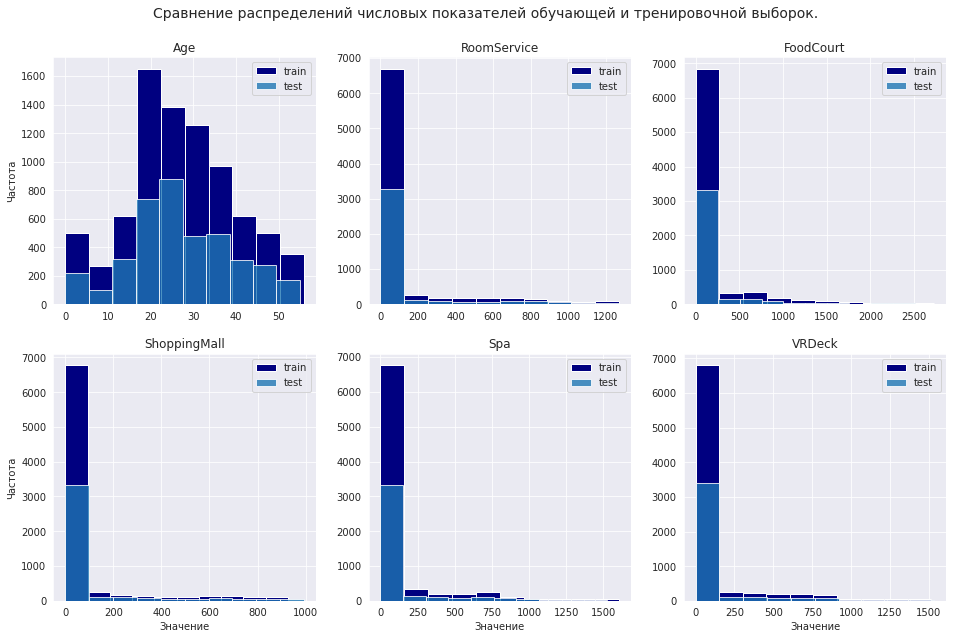

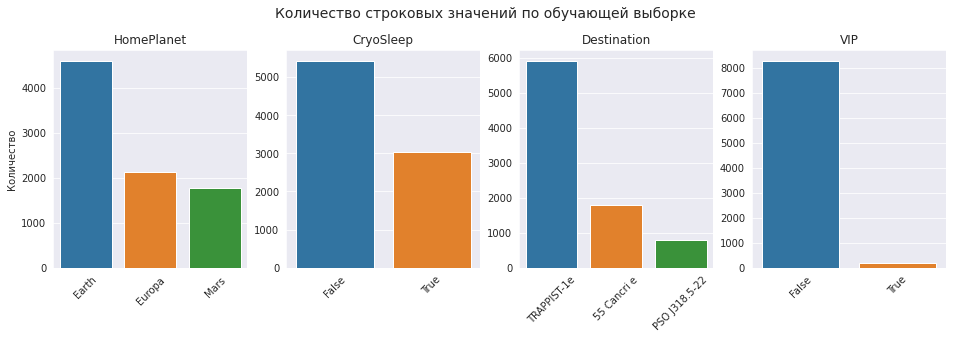

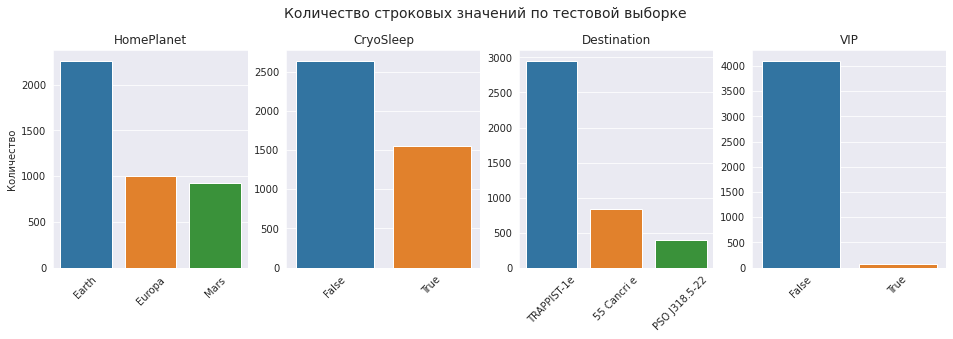

In [ ]:
print('-' * 50, 'Обучающий набор', '-' * 50)
print()
display(train_data.head(3))
print()
display(train_data.info())
print()
print('-' * 50, 'Тестовый набор', '-' * 50)
print()
display(test_data.head(3))
print()
display(test_data.info())
print()
print()
print('-' * 35, 'Визуализация возможных различий в данных', '-' * 35)
print()
with_type_float = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
upper_train_quantiles= [train_data[i].quantile(0.95) for i in with_type_float]
upper_test_quantiles = [test_data[i].quantile(0.95) for i in with_type_float]
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10))
plt.suptitle('Сравнение распределений числовых показателей обучающей и тренировочной выборок.', 
             y = 0.95, fontsize = 14)
for i in range(2):
  for j in range(3):
    ax = axes[i][j]
    if i == 0:
      feature = with_type_float[j]   
      ax.hist(train_data.query(f'{feature}<={upper_train_quantiles[j]}')[feature], 
              color = 'navy', label = 'train')
      ax.hist(test_data.query(f'{feature}<={upper_test_quantiles[j]}')[feature], 
              alpha = 0.8, label = 'test')
      ax.set_title(feature)
      ax.legend()
      if j == 0:
        ax.set_ylabel('Частота')
    else:
      feature = with_type_float[j+3]   
      ax.hist(train_data.query(f'{feature}<={upper_train_quantiles[j+3]}')[feature], 
              color = 'navy', label = 'train')
      ax.hist(test_data.query(f'{feature}<={upper_test_quantiles[j+3]}')[feature], 
              alpha = 0.8, label = 'test')
      ax.set_title(feature)
      ax.legend()
      ax.set_xlabel('Значение')
      if j == 0:
        ax.set_ylabel('Частота')
plt.show()
print()
with_type_object = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
plt.suptitle('Количество строковых значений по обучающей выборке', y = 1.03, fontsize = 14)
for i in range(4):
  feature = with_type_object[i] 
  train_value_counts = train_data[feature].value_counts()
  sns.barplot(x = train_value_counts.index, y = train_value_counts.values, ax = axes[i]) 
  axes[i].set_title(feature)  
  axes[i].set_xticklabels(train_value_counts.index, rotation = 45)
  if i == 0:
    axes[i].set_ylabel('Количество')
plt.show()
print()
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 4))
plt.suptitle('Количество строковых значений по тестовой выборке', y = 1.03, fontsize = 14)
for i in range(4):
  feature = with_type_object[i] 
  test_value_counts = test_data[feature].value_counts()
  sns.barplot(x = test_value_counts.index, y = test_value_counts.values, ax = axes[i])
  axes[i].set_title(feature)  
  axes[i].set_xticklabels(test_value_counts.index, rotation = 45)
  if i == 0:
    axes[i].set_ylabel('Количество')
plt.show()

### Выделение признаков, обработка пропусков.

In [ ]:
import missingno as msno

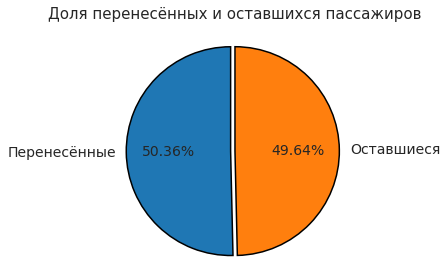

In [ ]:
share_of_transported = train_data['Transported'].value_counts()

plt.pie(share_of_transported.values, labels = ['Перенесённые', 'Оставшиеся'], 
        explode = [0.05, 0], autopct = '%1.2f%%', startangle = 90, 
        textprops = {'fontsize': 14}, radius = 1.2, 
        wedgeprops = {'linewidth': 1.5, 'edgecolor': 'black'})
plt.title('Доля перенесённых и оставшихся пассажиров', y = 1.08, fontsize = 15)
plt.show()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
Transported       0
dtype: int64

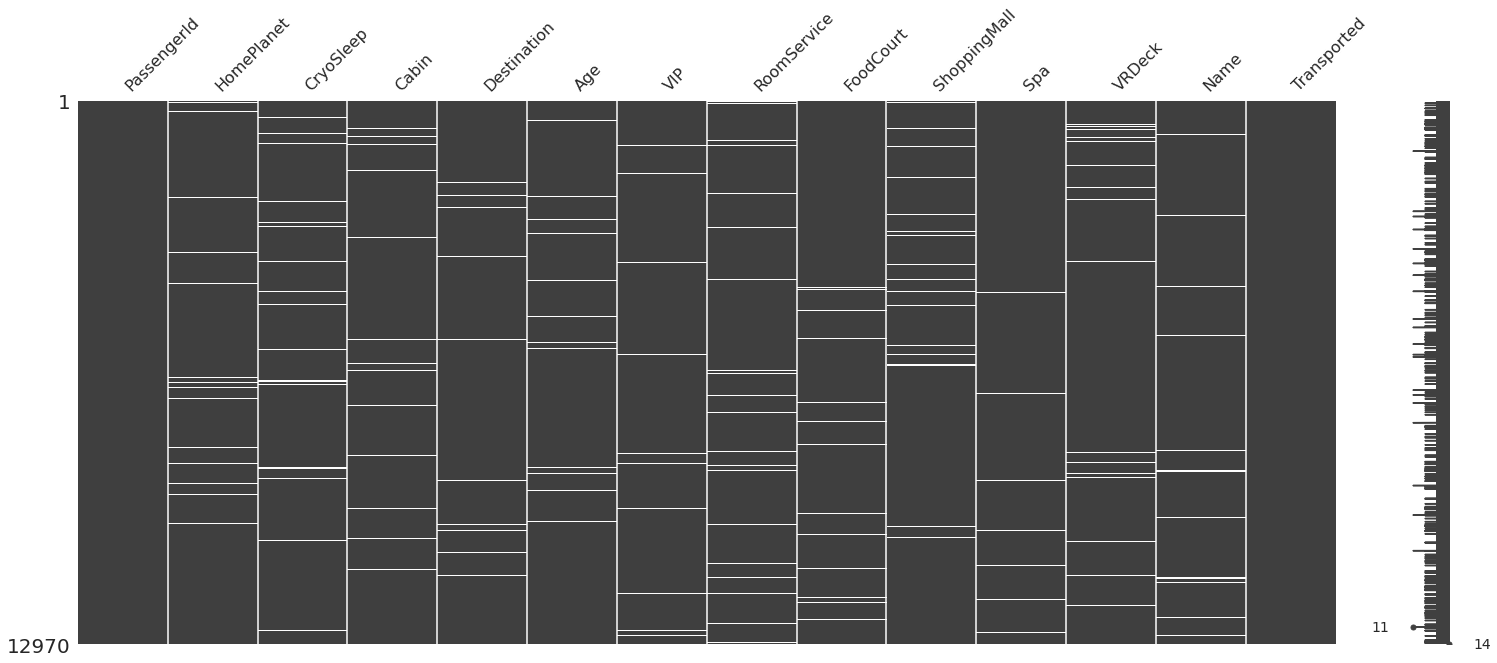

In [ ]:
test_data['Transported'] = 'test_data'
titanic_df = train_data.append(test_data)

display(titanic_df.isnull().sum())
print()
msno.matrix(titanic_df)
plt.show()


In [ ]:
# Выделение таких признаков как: номер группы, сторона корабля(side), палуба(deck)

passengers_groups = titanic_df['PassengerId'].map(lambda x: x[:4])
passenger_number = titanic_df['PassengerId'].map(lambda x: x[-2:])
boards = titanic_df['Cabin'].map(lambda x: str(x)[-1] if type(x) is str else None)
decks = titanic_df['Cabin'].map(lambda x: str(x)[0] if type(x) is str else None)
titanic_df.insert(1, 'PassengersGroups', passengers_groups.values)
titanic_df.insert(2, 'PassengerNumber', passenger_number.values)
titanic_df.insert(5, 'Deck', decks.values)
titanic_df.insert(6, 'Board', boards.values)

# Количество пассажиров в группе.

group_and_members = titanic_df[['PassengersGroups', 'PassengerNumber']]
group_and_members['PassengerNumber'] = group_and_members['PassengerNumber'].astype(int)
group_and_members = group_and_members.groupby('PassengersGroups', as_index = False)\
                                             ['PassengerNumber'].max()
group_and_members.rename(columns = {'PassengerNumber': 'GroupMembers'}, inplace = True)

titanic_df = titanic_df.merge(group_and_members, on = 'PassengersGroups')
columns_list = titanic_df.columns.to_list()
columns_list.insert(3, columns_list.pop(-1)) 
titanic_df = titanic_df.reindex(columns = columns_list)
titanic_df.head(3)

,PassengerId,PassengersGroups,PassengerNumber,GroupMembers,HomePlanet,CryoSleep,Deck,Board,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0001,01,1,Europa,False,B,P,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0002,01,1,Earth,False,F,S,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,0003,01,2,Europa,False,A,S,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


*Часть пропущенных значений можно обработать, используя информацию об остальных пассажирах соответствующей группы.*

In [ ]:
# Функция для обработки признаков, содержащих стороковые значения. 
## Заполняется модой по группе.

def fill_gaps_for_object(feature):
  null_data = titanic_df.query('GroupMembers>1')[titanic_df[feature].isnull() == True]
  null_groups = null_data['PassengersGroups'].to_list()
  for group in null_groups:
    if titanic_df.query(f"PassengersGroups=='{group}'")[feature].mode().shape[0] != 0:
      value = titanic_df.query(f"PassengersGroups=='{group}'")[feature].mode()[0]
      titanic_df.loc[(titanic_df['PassengersGroups'] == group) & 
                    (titanic_df[feature].isnull() == True), feature] = value

# Функция для обработки признаков, содержащих числовые значения. 
## Заполняется медианой по группе.

def fill_gaps_for_numeric(feature):
  null_data = titanic_df.query('GroupMembers>1')[titanic_df[feature].isnull() == True]
  null_groups = null_data['PassengersGroups'].to_list()
  for group in null_groups:
    value = titanic_df.query(f"PassengersGroups=='{group}'")[feature].median()
    titanic_df.loc[(titanic_df['PassengersGroups'] == group) & 
                    (titanic_df[feature].isnull() == True), feature] = value

for feature in ['HomePlanet', 'CryoSleep', 'Board', 'Deck', 'Destination', 'VIP']:
  fill_gaps_for_object(feature)
  
for feature in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
  fill_gaps_for_numeric(feature)

*Для заполнения пропущенных значений по пассажирам, которые путешествовали одни, будет использованы мода и медиана, характерные для всего датасета.*

In [ ]:
for feature in ['HomePlanet', 'CryoSleep', 'Board', 'Deck', 'Destination', 'VIP']:
  titanic_df[feature] = titanic_df[feature].fillna(titanic_df[feature].mode()[0])

for feature in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']:
  titanic_df[feature] = titanic_df[feature].fillna(titanic_df[feature].mean())

In [ ]:
titanic_df.isnull().sum()

PassengerId           0
PassengersGroups      0
PassengerNumber       0
GroupMembers          0
HomePlanet            0
CryoSleep             0
Deck                  0
Board                 0
Cabin               299
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Name                294
Transported           0
dtype: int64

### Исследование зависимостей.

In [ ]:
titanic_train = titanic_df.query("Transported!='test_data'")
titanic_train['GroupMembers'] = titanic_train['GroupMembers'].astype(str)

**Признаки, сождержащие категориальные значения.**

*Выведем информацию о количестве перенесённых пассажиров в зависимости от значения соответствующего признака*

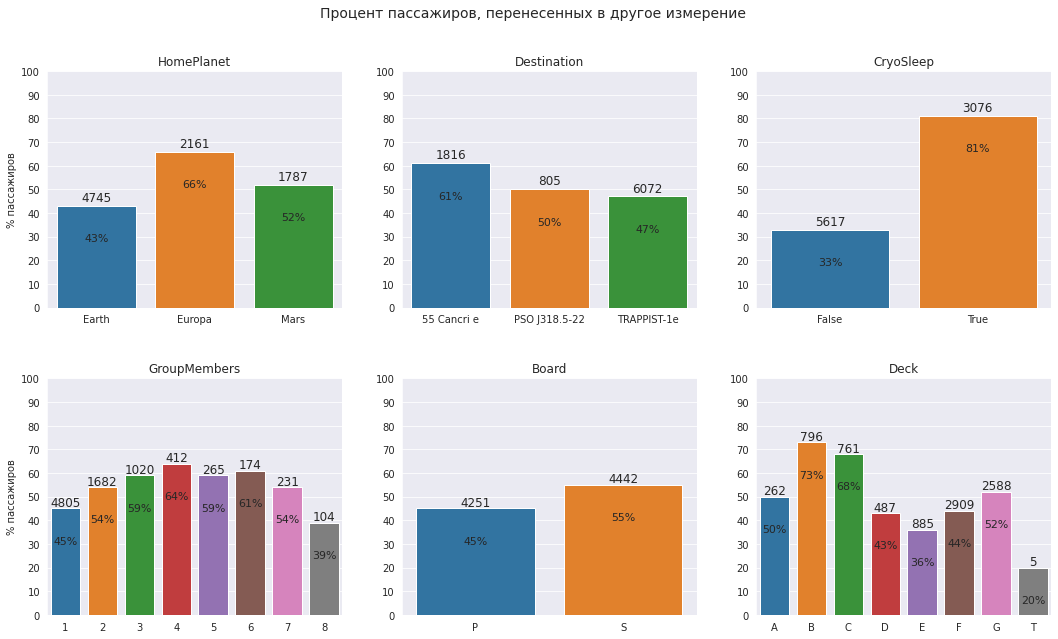

In [ ]:
feature_list1 = ['HomePlanet', 'Destination', 'CryoSleep', 'GroupMembers', 'Board', 'Deck']
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (18, 10))
plt.suptitle('Процент пассажиров, перенесенных в другое измерение', y = 0.97, fontsize = 14)
plt.subplots_adjust(hspace = 0.3)
for i in range(2):
  for j in range(3):
    ax = axes[i][j]    
    if i == 0:
      feature = feature_list1[j] 
      feature_data = titanic_train.groupby(feature)['Transported'].mean().round(2) * 100 
      number_of_passengers = titanic_train.groupby(feature)['PassengerId'].count()
      sns.barplot(x = feature_data.index, y = feature_data.values, ax = ax)
      for n, value in enumerate(number_of_passengers):
        ax.text(n, feature_data[n]+2, value, fontsize = 12, horizontalalignment = 'center')
        ax.text(n, feature_data[n]-15, f'{int(feature_data[n])}%', fontsize = 11, 
                horizontalalignment = 'center')
      ax.set_title(feature)
      ax.set_xlabel(None)
      if j == 0:
        ax.set_ylabel('% пассажиров')
    else:
      feature = feature_list1[j+3] 
      feature_data = titanic_train.groupby(feature)['Transported'].mean().round(2) * 100 
      number_of_passengers = titanic_train.groupby(feature)['PassengerId'].count()
      sns.barplot(x = feature_data.index, y = feature_data.values, ax = ax)
      for n, value in enumerate(number_of_passengers):
        ax.text(n, feature_data[n]+1, value, fontsize = 12, horizontalalignment = 'center')
        ax.text(n, feature_data[n]-15, f'{int(feature_data[n])}%', fontsize = 11, 
                horizontalalignment = 'center')
      ax.set_title(feature)
      ax.set_xlabel(None)
      if j == 0:
        ax.set_ylabel('% пассажиров')
    ax.set_yticks(range(0, 110, 10))

- *Значения над столбцами соответствуют количеству пассажиров.*
- *Значения внутри столбцов - процент перенесённых пассажиров.*

Из текущего графика можно сделать следующие выводы (***касательно только тех пассажиров, дальнейшая судьба которых известна***):
1. Можно сказать, что процент перенесённых пассажиров выше для тех, кто отправлялся с планеты "Европа", находился в криосне, а также, имел точкой прибытия планету "55 Cancrie".
2. C точки зрения номера палубы "B" и "C" имеют больший процент среди перенеcённых пассажиров, "D", "E", "F" - меньший.
3. Качательно нумерации кабин, начиная с 5 номера, доля перенесённых пасажиров возрастает. Можно, также, сказать, что процент перенесенных ниже среди тех, кто путешествовал один.


**Дополнительные сервисы.**

*В первую очередь,следует посмотреть на соотношение пассажиров, которые пользовались или не пользовались дополнительными услугами. Далее, при помощи перестановочных тестов, оценим разницу в тратах на эти услуги.*

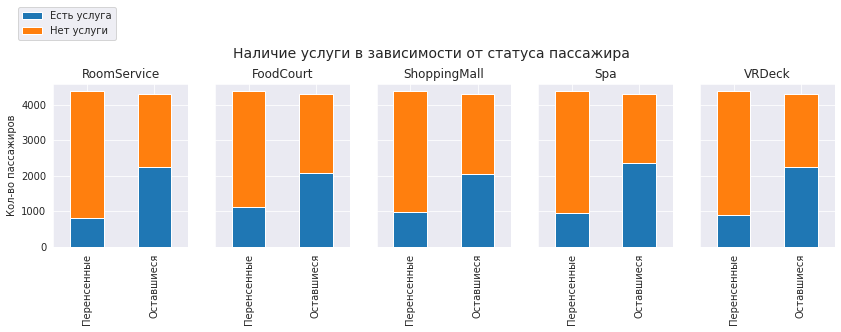

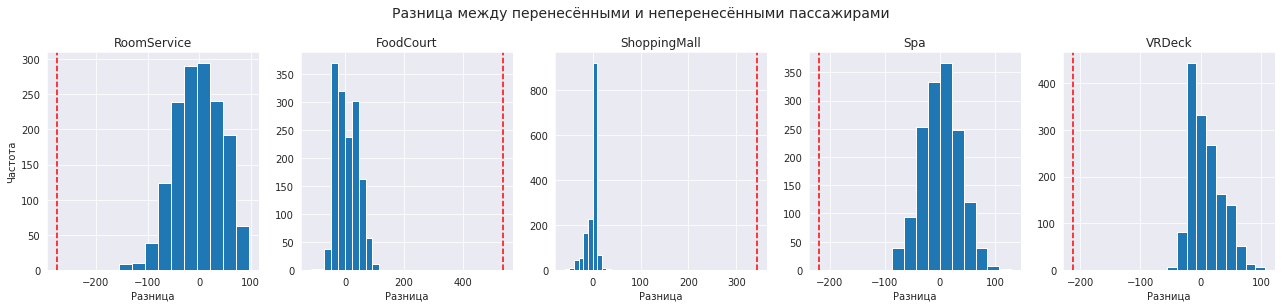

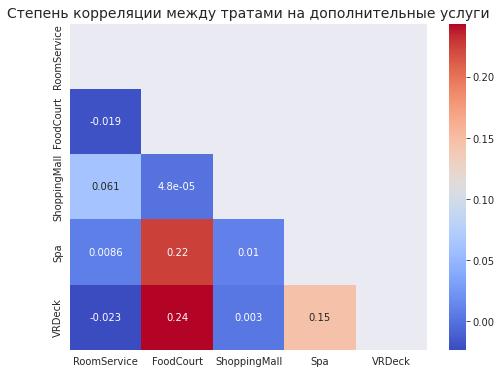

In [ ]:
feature_list2 = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (14, 3), sharey = True)
plt.suptitle('Наличие услуги в зависимости от статуса пассажира', y = 1.05, fontsize = 14)
for i in range(5):
  ax = axes[i]
  feature = feature_list2[i]
  transported = titanic_train.query('Transported==1')[feature]
  transported = np.where(transported > 0, 1, 0)
  not_transported = titanic_train.query('Transported==0')[feature]
  not_transported = np.where(not_transported > 0, 1, 0)
  array_of_values = np.array([[transported.sum(), transported.size - transported.sum()], 
                              [not_transported.sum(), 
                               not_transported.size - not_transported.sum()]])
  data = pd.DataFrame({'Есть услуга': array_of_values[:, 0], 
                       'Нет услуги': array_of_values[:, 1]}, 
                       index = ['Перенсенные', 'Оставшиеся'])
  data.plot.bar(stacked=True, ax = ax)
  ax.set_title(feature)
  ax.set_ylabel('Кол-во пассажиров')
  ax.legend(bbox_to_anchor=(0, 0, 0.5, 1.5))
  if i != 0:
    ax.legend([],[], frameon=False)
plt.show()
print()
print()

def permutation_test(array_1, array_2):
  array_united = np.hstack([array_1, array_2])
  differences = []        
  for iteration in range(1500):
    array_permutation = np.random.permutation(array_united)
    group_1 = array_permutation[:array_1.shape[0]]
    group_2 = array_permutation[array_1.shape[0]:]
    differences.append(np.median(group_1) - np.median(group_2))
  return differences

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (22, 4))
plt.suptitle('Разница между перенесёнными и неперенесёнными пассажирами', 
             y = 1.04, fontsize = 14)
for i in range(5):
  ax = axes[i]
  feature = feature_list2[i] 
  transported = titanic_train.query('Transported==1')[feature].dropna()
  not_transported = titanic_train.query('Transported==0')[feature].dropna()
  transported = transported[transported > 0]
  not_transported = not_transported[not_transported > 0]
  difference_of_averages = transported.median() - not_transported.median()
  differences = permutation_test(not_transported, transported)
  ax.hist(differences)
  ax.axvline(x = difference_of_averages, color = 'red', linestyle = '--')
  ax.set_title(feature) 
  if i == 0:     
    ax.set_ylabel('Частота')
  ax.set_xlabel('Разница')
plt.show()
print()
print()
plt.figure(figsize = (8, 6))
additional_services = titanic_df[feature_list2]
matrix = np.triu(additional_services.corr())
sns.heatmap(additional_services.corr(), annot = True, mask = matrix, cmap = 'coolwarm')
plt.title('Степень корреляции между тратами на дополнительные услуги', fontsize = 14)
plt.show()



*Как видно из графиков, перенесённые пользователи в большинстве не пользовались дополнительными сервисами.*

*По всем признакам мы наблюдаем статистически значимые различия. Сильной корреляции не выявлено.*

**Возраст.**

*Более детально взглянем на различия в возрасте между перенесёнными и оставшимися пассажирами.*

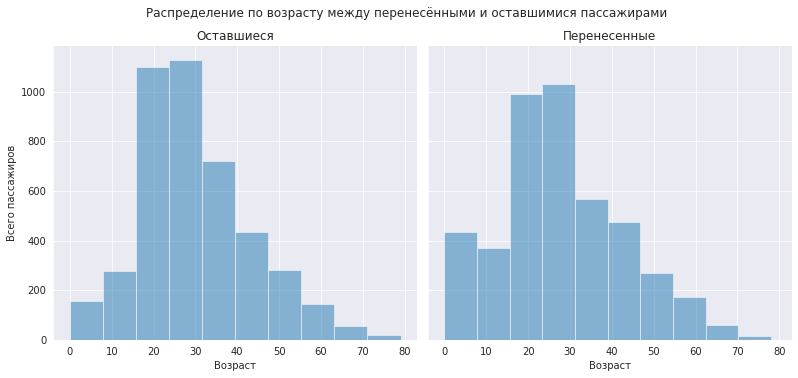

In [ ]:
grid = sns.FacetGrid(titanic_train, col = 'Transported', height = 5, aspect = 1.1)
grid.map(plt.hist, 'Age', alpha = 0.5)
grid.fig.suptitle('Распределение по возрасту между перенесёнными и оставшимися пассажирами', 
                  y = 1.04, fontsize = 12)
grid.set_axis_labels(' ', 'Всего пассажиров')
for attr, ax in grid.axes_dict.items():
  ax.set_xlabel('Возраст')
  if attr == 0:
    ax.set_title('Оставшиеся', fontsize = 12)
  else:
    ax.set_title('Перенесенные', fontsize = 12)
plt.show()

*Можно сказать, что среди пассажиров в возрасте до 20 лет наблюдается больший процент тех, которые были перенесены.*

**Очередность посадки.**

*Если предположить, что номер группы подразумевает какую-либо упорядоченность, то можно визуализировать зависимость итога от "очередности" групп.*

In [ ]:
titanic_train['PassengersGroups'] = titanic_train['PassengersGroups'].astype(int)
titanic_train['PassengersGroups'] = titanic_train['PassengersGroups'] // 1000

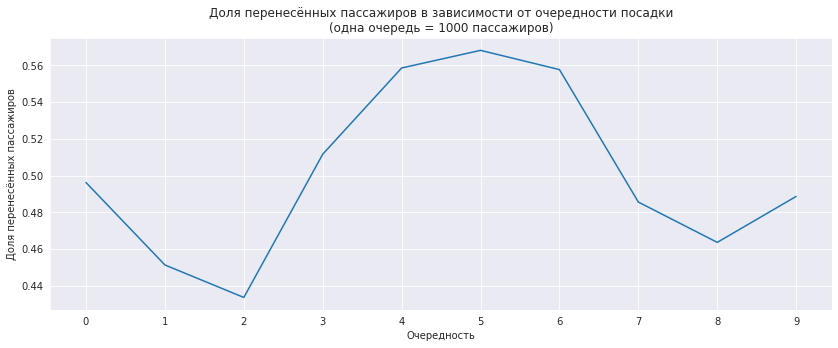

In [ ]:
data_for_plot = titanic_train.groupby('PassengersGroups', as_index = False)['Transported'].mean()

plt.figure(figsize = (14, 5))
plt.plot(data_for_plot['PassengersGroups'], data_for_plot['Transported'])
plt.title('Доля перенесённых пассажиров в зависимости от очередности посадки' 
          '\n(одна очередь = 1000 пассажиров)')
plt.xlabel('Очередность')
plt.xticks(range(data_for_plot['PassengersGroups'].max() + 1))
plt.ylabel('Доля перенесённых пассажиров')
plt.show()

### Выделение основных признаков для будущей модели.

In [ ]:
prepared_data = titanic_df.copy()
prepared_data.columns

Index(['PassengerId', 'PassengersGroups', 'PassengerNumber', 'GroupMembers',
       'HomePlanet', 'CryoSleep', 'Deck', 'Board', 'Cabin', 'Destination',
       'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported'],
      dtype='object')

In [ ]:
prepared_data = prepared_data.drop(['PassengerId', 'PassengerNumber', 
                                    'VIP', 'Name', 'Cabin'], axis = 1)

prepared_data['PassengersGroups'] = prepared_data['PassengersGroups'].astype(int)
prepared_data['PassengersGroups'] = prepared_data['PassengersGroups'] // 1000
prepared_data['GroupMembers'] = prepared_data['GroupMembers'].astype(int)
prepared_data['CryoSleep'] = prepared_data['CryoSleep'].astype(int)

obj_cols = ['HomePlanet', 'Deck', 'Board', 'Destination', 'PassengersGroups']
prepared_data[obj_cols] = prepared_data[obj_cols].astype('category')

In [ ]:
prepared_data['TotalExpenses'] = prepared_data[['RoomService', 'FoodCourt', 'Spa', 
                                                'VRDeck', 'ShoppingMall']].sum(axis = 1)

In [ ]:
prepared_data_dummies = pd.get_dummies(prepared_data.drop('Transported', axis = 1))
prepared_data_dummies['Transported'] = prepared_data['Transported']

In [ ]:
visualization_of_correlation = prepared_data_dummies.query("Transported!='test_data'")
visualization_of_correlation['Transported'] = visualization_of_correlation['Transported'].astype(int)

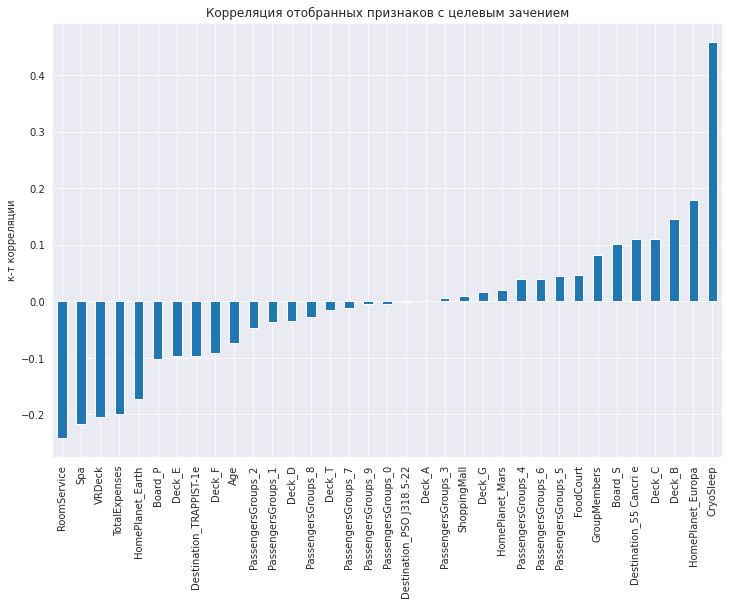

In [ ]:
visualization_of_correlation.corr()['Transported'].sort_values().iloc[:-1]\
                            .plot(kind = 'bar', figsize = (12, 8), ylabel = 'к-т корреляции', 
                                  title = 'Корреляция отобранных признаков с целевым зачением')
plt.show()

In [ ]:
idx = abs(visualization_of_correlation.corr()['Transported']) < 0.02
uninformative = visualization_of_correlation.corr()['Transported'][idx].index
prepared_data_dummies = prepared_data_dummies.drop(uninformative, axis = 1)

In [ ]:
features = prepared_data_dummies.query("Transported!='test_data'").drop('Transported', axis = 1)
targets = prepared_data_dummies.query("Transported!='test_data'")['Transported']
targets = targets.astype(int)

### Построение модели ML.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

from sklearn.metrics import roc_auc_score, f1_score

from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, 
                                                    stratify = targets, random_state = 17)

In [ ]:
gbc = GradientBoostingClassifier(min_samples_leaf = 2, n_estimators = 150, subsample = 0.88, 
                                 max_depth = 4, learning_rate = 0.1, random_state = 17)

gbc_model = gbc.fit(x_train, y_train)
gbc_predict = gbc_model.predict(x_test)
gbc_predict_proba = gbc_model.predict_proba(x_test)[:, 1]

print('GradientBoostingClassifier')
print('*' * 35)
print(f'Правильность на обучающем наборе: {round(gbc_model.score(x_train, y_train), 4)}')
print()
print(f'Правильность на тестовом наборе: {round(gbc_model.score(x_test, y_test), 4)}')
print(f'f1_score: {round(f1_score(y_test, gbc_predict)*100, 4)}')
print(f'ROC_AUC: {round(roc_auc_score(y_test, gbc_predict)*100, 4)}')
print(f'ROC_AUC_proba: {round(roc_auc_score(y_test, gbc_predict_proba)*100, 4)}')

GradientBoostingClassifier
***********************************
Правильность на обучающем наборе: 0.8553

Правильность на тестовом наборе: 0.8154
f1_score: 81.5835
ROC_AUC: 81.544
ROC_AUC_proba: 90.2891


In [ ]:
xgb = XGBClassifier(max_depth = 3, n_estimators = 100, subsample = 0.87, random_state=17)
xgb_model = xgb.fit(x_train, y_train)

xgb_predict = xgb_model.predict(x_test)
xgb_predict_proba = xgb_model.predict_proba(x_test)[:, 1]

print('XGBClassifier')
print('*' * 35)
print(f'Правильность на обучающем наборе: {round(xgb_model.score(x_train, y_train), 4)}')
print()
print(f'Правильность на тестовом наборе: {round(xgb_model.score(x_test, y_test), 4)}')
print(f'f1_score: {round(f1_score(y_test, xgb_predict)*100, 4)}')
print(f'ROC_AUC: {round(roc_auc_score(y_test, xgb_predict)*100, 4)}')
print(f'ROC_AUC_proba: {round(roc_auc_score(y_test, xgb_predict_proba)*100, 4)}')

XGBClassifier
***********************************
Правильность на обучающем наборе: 0.8408

Правильность на тестовом наборе: 0.8206
f1_score: 82.2323
ROC_AUC: 82.0559
ROC_AUC_proba: 90.0925


### Анализ полученных результатов.

In [ ]:
# Визуализация матрицы ошибок

def plot_confusion_matrix_illustration(conf_matrix, model_name):
    plt.figure(figsize = (6, 6))
    confusion = conf_matrix
    plt.title(f'Матрица ошибок для {model_name}', fontsize = 18, y = 1.05)
    plt.text(0.40, 0.7, confusion[0, 0], size = 50, horizontalalignment = 'right')
    plt.text(0.40, 0.2, confusion[1, 0], size = 50, horizontalalignment = 'right')
    plt.text(0.90, 0.7, confusion[0, 1], size = 50, horizontalalignment = 'right')
    plt.text(0.90, 0.2, confusion[1, 1], size = 50, horizontalalignment = 'right')
    plt.xticks([0.25, 0.75], ['pred "remained"', 'pred "transorted"'], size = 15)
    plt.yticks([0.25, 0.75], ['true "transorted"', 'true "remained"'], size = 15)
    plt.plot([0.5, 0.5], [0, 1], '--', c = 'k')
    plt.plot([0, 1], [0.5, 0.5], '--', c = 'k')

    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.show()

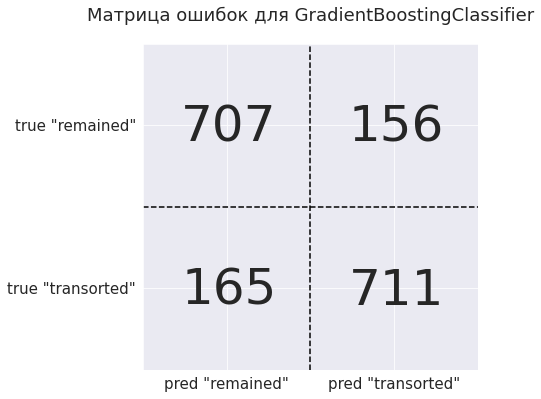

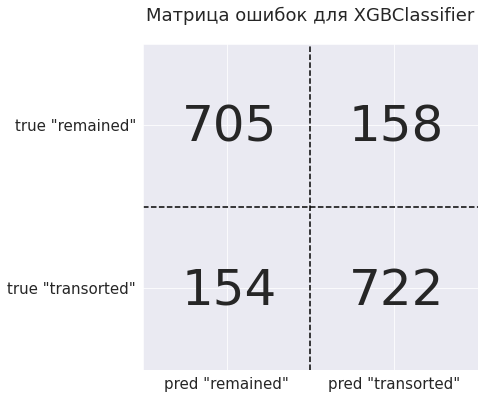

In [ ]:
plot_confusion_matrix_illustration(confusion_matrix(y_test, gbc_predict), 'GradientBoostingClassifier')
print()
print()
print()
plot_confusion_matrix_illustration(confusion_matrix(y_test, xgb_predict), 'XGBClassifier')

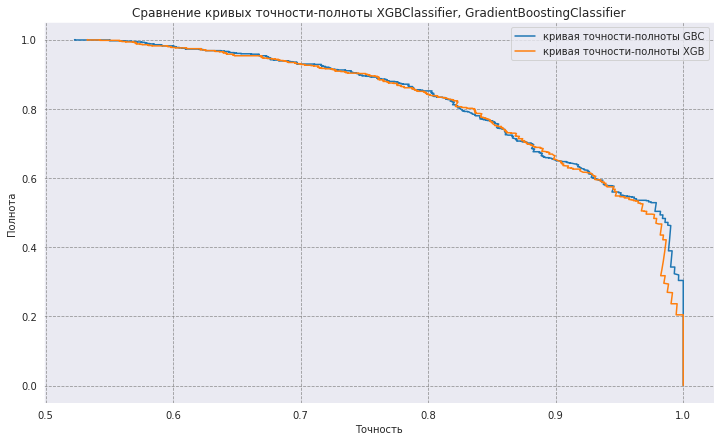

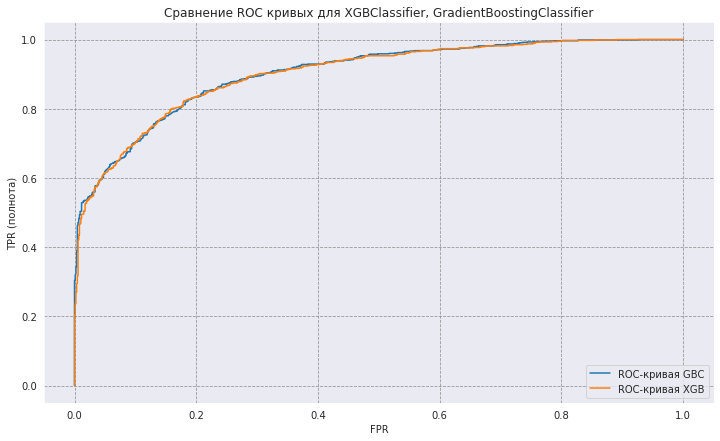

In [ ]:
plt.figure(figsize = (12, 7))
plt.title('Сравнение кривых точности-полноты XGBClassifier, GradientBoostingClassifier')

gbc_fpr, gbc_tpr, gbc_thresholds = precision_recall_curve(y_test, gbc_predict_proba)
xgb_fpr, xgb_tpr, xgb_thresholds = precision_recall_curve(y_test, xgb_predict_proba)
plt.plot(gbc_fpr, gbc_tpr, label = 'кривая точности-полноты GBC')
plt.plot(xgb_fpr, xgb_tpr, label = 'кривая точности-полноты XGB')
plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.grid(color = 'gray', linestyle = '--', alpha  = 0.8)
plt.legend(loc = 'best')

plt.figure(figsize = (12, 7))
plt.title('Сравнение ROC кривых для XGBClassifier, GradientBoostingClassifier')
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc_predict_proba)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_predict_proba)
plt.plot(gbc_fpr, gbc_tpr, label = 'ROC-кривая GBC')
plt.plot(xgb_fpr, xgb_tpr, label = 'ROC-кривая XGB')
plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')
plt.grid(color = 'gray', linestyle = '--', alpha  = 0.8)
plt.legend(loc = 4)
plt.show()

### Загрузка контрольного результата

In [ ]:
result = xgb_model.predict(prepared_data_dummies.query("Transported=='test_data'").drop('Transported', axis = 1))

result_csv = pd.DataFrame({'PassengerID': test_data['PassengerId'],
                           'Transported': result})

result_csv['Transported'] = result_csv['Transported'].astype(bool)

result_csv.to_csv('submission.csv', index=False)